Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Importing the Dataset

In [2]:
train_df=pd.read_csv('termdeposit_train.csv')
train_df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [3]:
test_df=pd.read_csv('termdeposit_test.csv')
test_df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


# Exploratory Data Analysis(EDA)

In [4]:
train_df.shape

(31647, 18)

In [5]:
test_df.shape

(13564, 17)

We can see the shape of our train and test datasets

In [6]:
train_df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [7]:
test_df.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

We can see the Data type present in our train and test data, which is same but only the y column(output) is missing in the test data.

Lets see if we have any null values present in the datasets.

In [8]:
train_df.isnull().sum() 

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [9]:
test_df.isnull().sum() 

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

No null values present in the datasets

In [10]:
train_df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [11]:
test_df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

Column names can be seen here 

In [12]:
#checking the nunique values in all columns
train_df.nunique()

ID            31647
age              76
job              12
marital           3
education         4
default           2
balance        6326
housing           2
loan              2
contact           3
day              31
month            12
duration       1454
campaign         45
pdays           509
previous         38
poutcome          4
subscribed        2
dtype: int64

In [13]:
test_df.nunique()

ID           13564
age             75
job             12
marital          3
education        4
default          2
balance       4292
housing          2
loan             2
contact          3
day             31
month           12
duration      1201
campaign        40
pdays          422
previous        33
poutcome         4
dtype: int64

The ID is unique for all the customers we can remove this from the train and test data

In [14]:
train_df.drop('ID', axis=1, inplace=True)

In [15]:
test_df.drop('ID', axis=1, inplace=True)

In [16]:
for i in train_df.columns:
    x = train_df[i].value_counts()
    print("\nColumn name is:",i,"and it value is:\n",x)


Column name is: age and it value is:
 32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64

Column name is: job and it value is:
 blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

Column name is: marital and it value is:
 married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

Column name is: education and it value is:
 secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

Column name is: default and it value is:
 no     31062
yes      585
Name: default, dtype: int64

Column name is: balance and it value is:
  0        2470
 1         137
 2         109
 4          95
 

from the above we have observed the below value counts:
1. Job - unknown - 206 values
2. education - unknown - 1314 values
3. contact - unknown - 9177 values
4. poutcome- unknown - 25929 values and other - 1288 values.

We can remove the 1288 values of others as it does not give any information.

Lets check out the values in test data

In [17]:
for i in test_df.columns:
    x = test_df[i].value_counts()
    print("\nColumn name is:",i,"and it value is:\n",x)


Column name is: age and it value is:
 32    628
34    609
35    580
31    579
33    566
     ... 
95      1
86      1
92      1
89      1
90      1
Name: age, Length: 75, dtype: int64

Column name is: job and it value is:
 blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: job, dtype: int64

Column name is: marital and it value is:
 married     8119
single      3868
divorced    1577
Name: marital, dtype: int64

Column name is: education and it value is:
 secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: education, dtype: int64

Column name is: default and it value is:
 no     13334
yes      230
Name: default, dtype: int64

Column name is: balance and it value is:
  0       1044
 1         58
 2         47
 3         46
 4         44
         

1. Job - unknown - 82
2. education - unknown - 543
3. contact - unknown - 3843
4. poutcome- unknown - 11030 values and other - 552 values.

Here also we have 552 other values in poutcome

In [18]:
train_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [19]:
test_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


## Data Visualization

<AxesSubplot:xlabel='job', ylabel='count'>

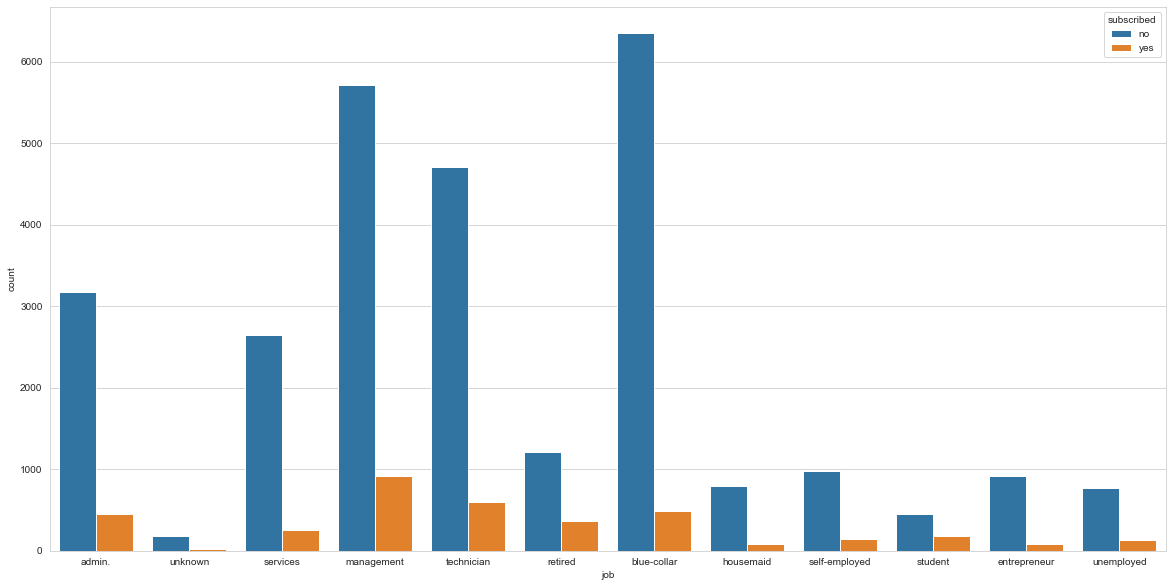

In [20]:
# Let us see the count of customers who subscribed to TD based on their job profile

sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
sns.countplot(x='job', hue = "subscribed", data=train_df)

Observations:
1. Management people have the highest subscriptions count.
2. Blue collar people have the highest unsubscribed count.

<AxesSubplot:xlabel='marital', ylabel='count'>

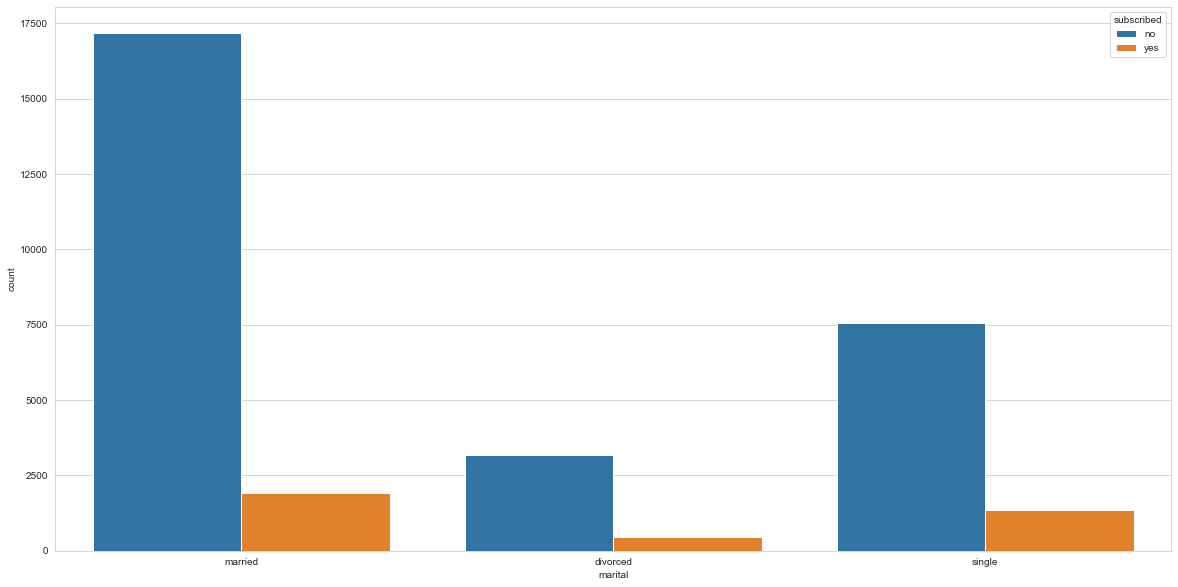

In [21]:
# Let us see the count of customers who subscribed to TD based on their Marital Status

plt.figure(figsize=(20,10))
sns.countplot(x='marital', hue = "subscribed", data=train_df)

Observations:
1. Married people have both highest numbers of subscription and unsubscriptions.
2. divorced people have the least subscriptions.

<AxesSubplot:xlabel='education', ylabel='count'>

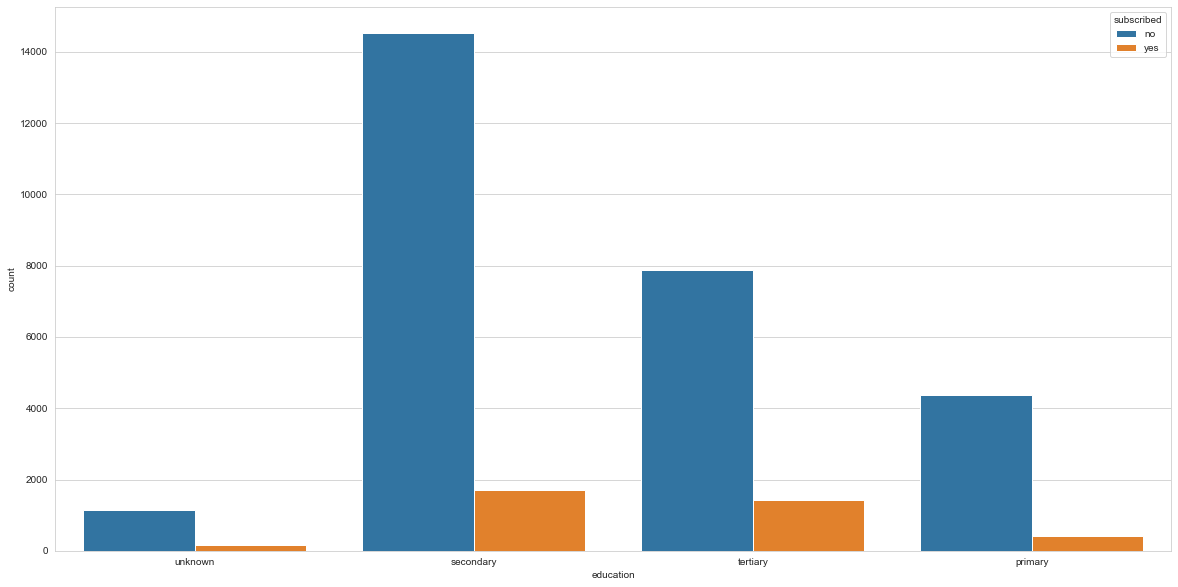

In [22]:
# Let us see the count of customers who subscribed to TD based on their education level

plt.figure(figsize=(20,10))
sns.countplot(x='education', hue = "subscribed", data=train_df)

Observation:
We can see that as education increases the subscription increases.

<AxesSubplot:xlabel='loan', ylabel='count'>

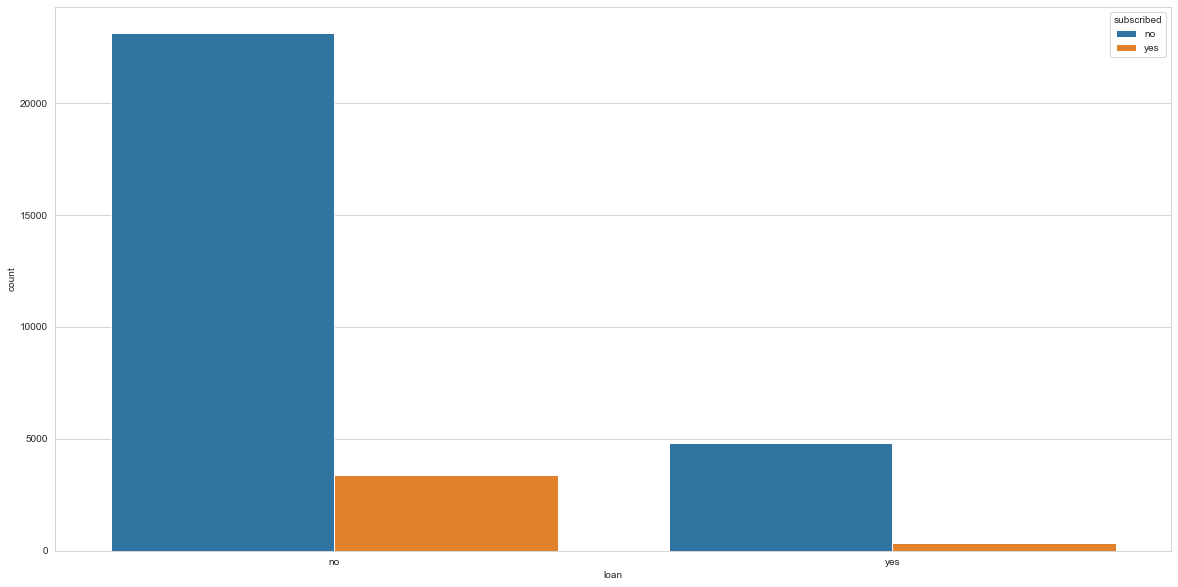

In [23]:
# Let us see the count of customers who subscribed to TD based on their Personal Loan Status

plt.figure(figsize=(20,10))
sns.countplot(x='loan', hue = "subscribed", data=train_df)

Observation: We can see that people with no personal loan have subscribed.

<AxesSubplot:xlabel='housing', ylabel='count'>

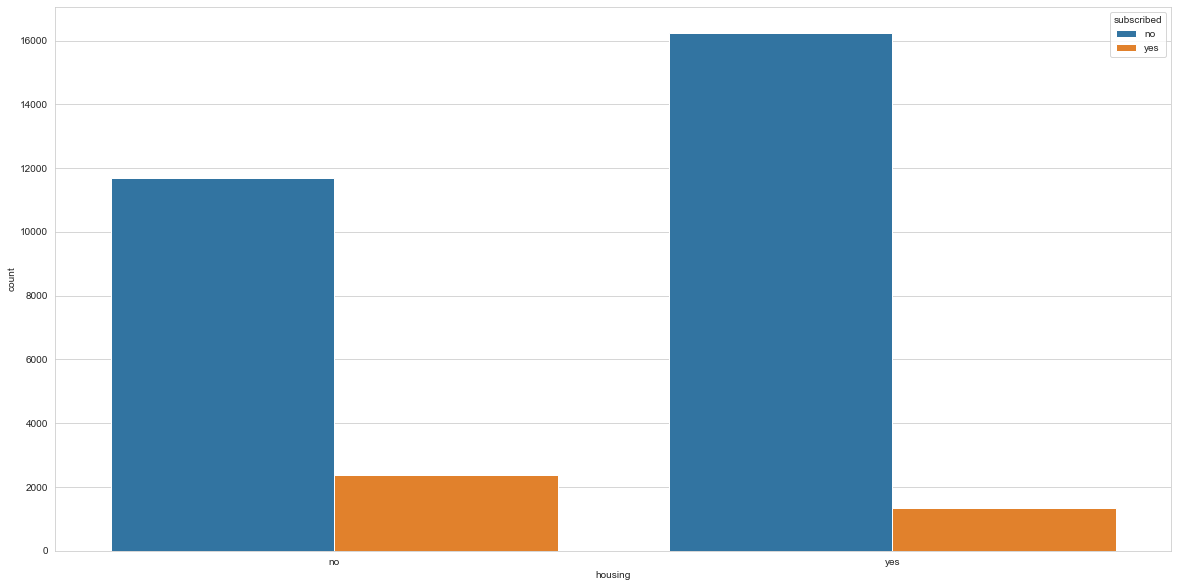

In [24]:
# Let us see the count of customers who subscribed to TD based on their Housing Loan Status
plt.figure(figsize=(20,10))
sns.countplot(x='housing', hue = "subscribed", data=train_df)

Observation: Its the same as personal loan.

<AxesSubplot:xlabel='contact', ylabel='count'>

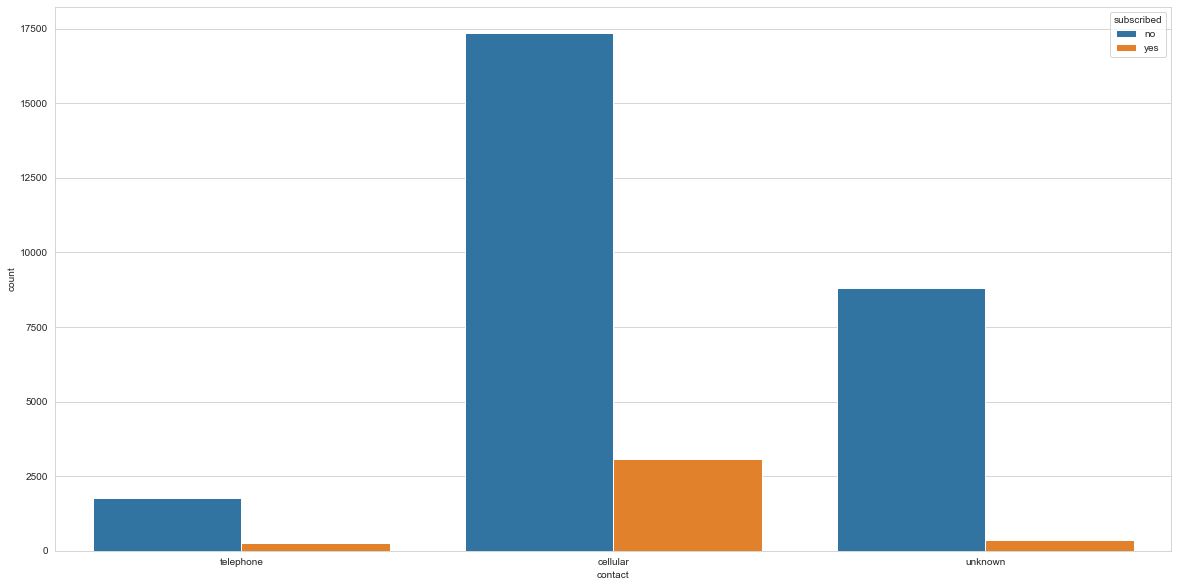

In [25]:
# Let us see the count of customers who subscribed to TD based on their mode of client communication
plt.figure(figsize=(20,10))
sns.countplot(x='contact', hue = "subscribed", data=train_df)

Observation: We can see that the people who were contacted through cell phone has high subscription.

<AxesSubplot:xlabel='default', ylabel='count'>

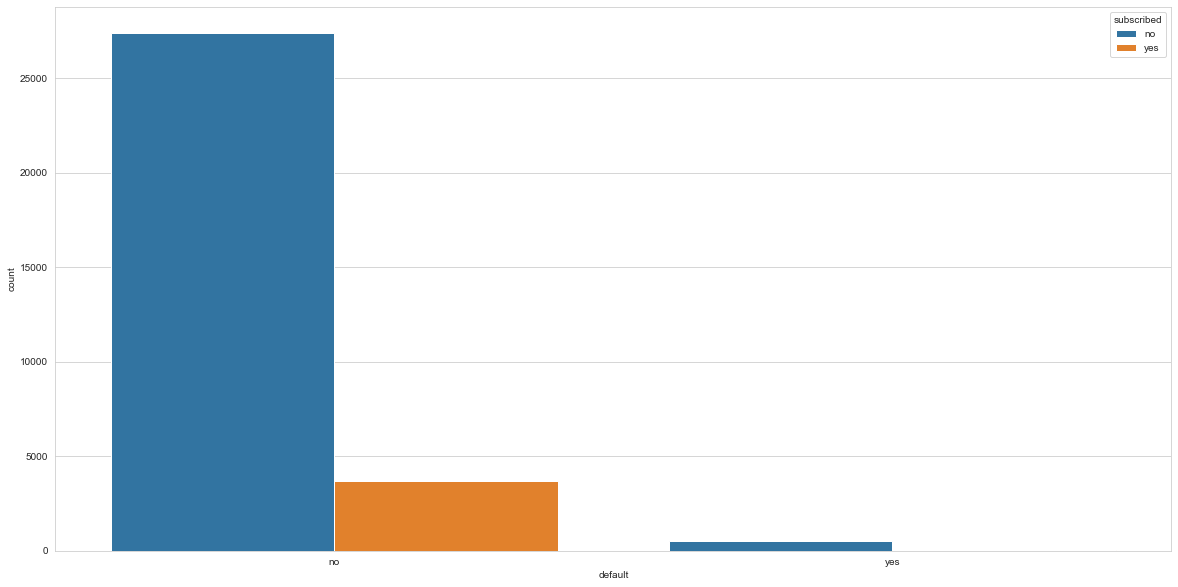

In [26]:
# Let us see the count of customers who subscribed to FD based on their Credit Default  Status
plt.figure(figsize=(20,10))
sns.countplot(x='default', hue = "subscribed", data=train_df)

Observation: As we can see the people with no default credit have subscribed.

<AxesSubplot:xlabel='month', ylabel='count'>

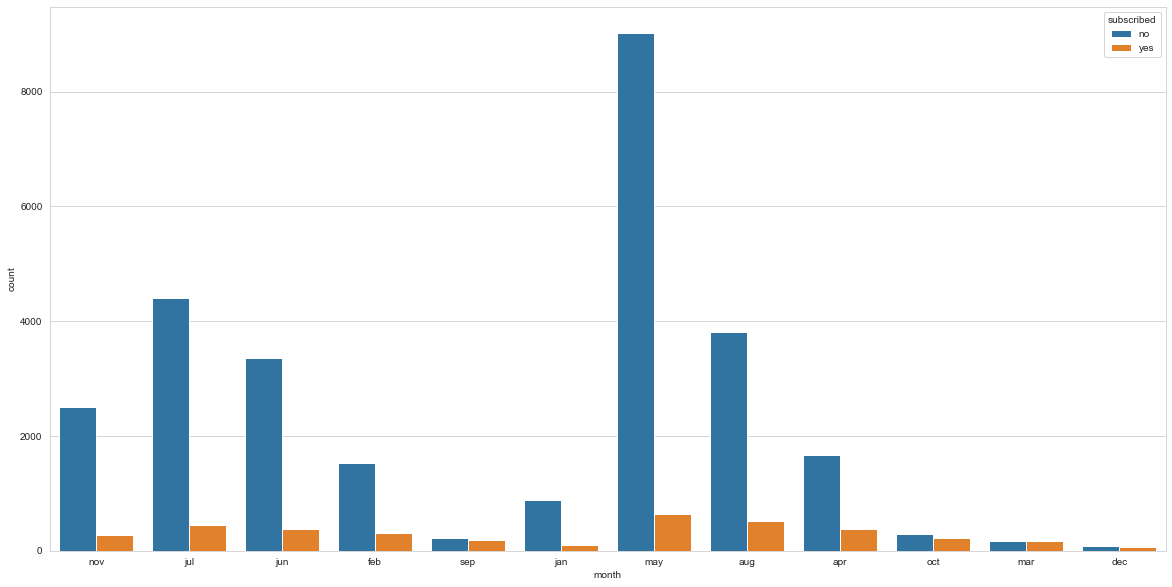

In [27]:
# Let us see the count of customers who subscribed to FD based on their last month of contact
plt.figure(figsize=(20,10))
sns.countplot(x='month', hue = "subscribed", data=train_df)

Observations:
1. We can see that the best time for campaign can be May month as it as highest number of subscribers.
2. Aug, april, june and july also have fairly good chances.
3. Jan, dec and sep have the least number of subscribers. 

<AxesSubplot:xlabel='age', ylabel='balance'>

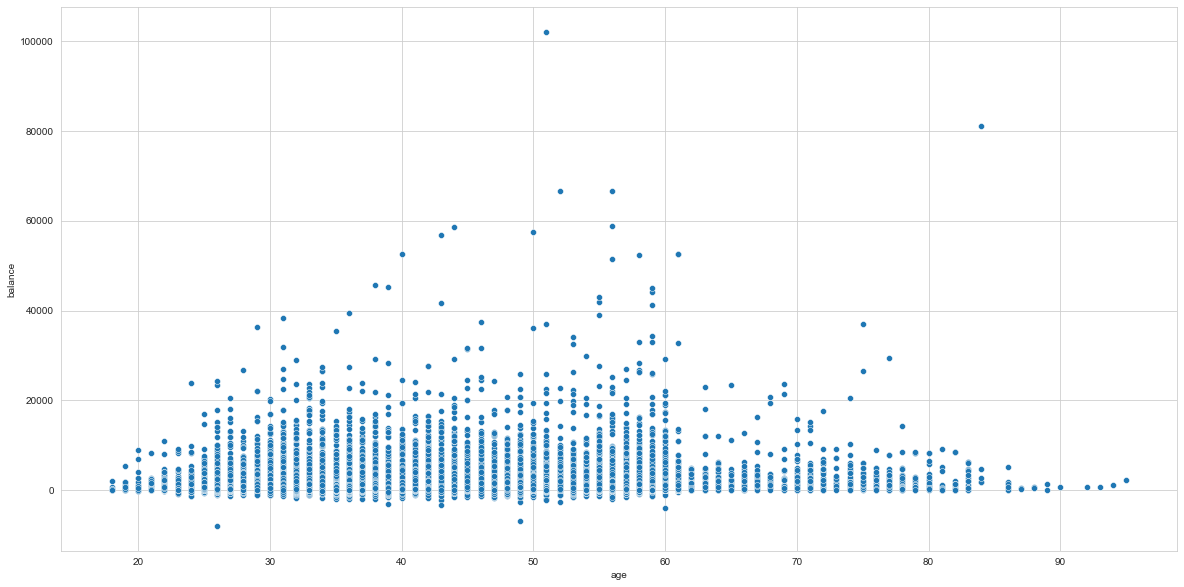

In [28]:
#Lets check the relationship between Age and Balance
plt.figure(figsize=(20,10))
sns.scatterplot(x='age',y='balance',data=train_df)

Observation:
We can see that there is no linear relationship between the age and balance.

<Figure size 1440x720 with 0 Axes>

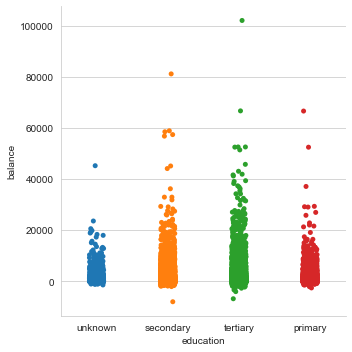

In [29]:
#Lets check the relationship between education and Balance
plt.figure(figsize=(20,10))
sns.catplot(x='education',y='balance',data=train_df)

As we can see the people with more education has good bank balance.

<Figure size 1440x720 with 0 Axes>

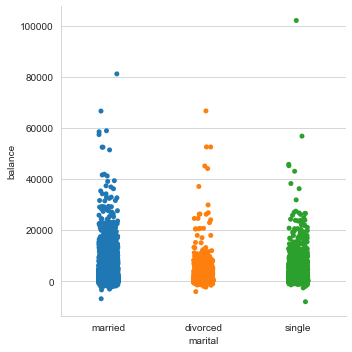

In [30]:
#Lets check the relationship between marital status and Balance
plt.figure(figsize=(20,10))
sns.catplot(x='marital',y='balance',data=train_df)

As expected the divorced have less bank balance compared to married and single.

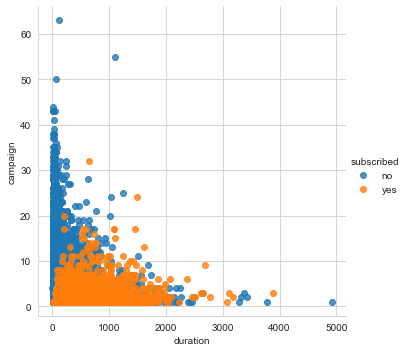

In [31]:
#Lets see how the duration and campaign affects our target variable
sns.lmplot(x='duration',y='campaign',hue='subscribed',data=train_df,fit_reg = False)

As we can observe above that when the campaign (number of contacts performed) is less and duration is less we have high subscription rate.

The duration is in seconds lets convert it into minutes for better understanding.

In [32]:
train_df['duration'] = train_df['duration'].apply(lambda n:n/60).round(2)

In [33]:
#applying the same for test data
test_df['duration'] = test_df['duration'].apply(lambda n:n/60).round(2)

In [34]:
train_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,0.73,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,1.52,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,4.00,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,14.45,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,6.33,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,1.93,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,7.30,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,0.62,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,0.37,7,337,12,failure,no


In [35]:
test_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,services,married,secondary,no,118,yes,no,cellular,15,may,0.33,6,-1,0,unknown
1,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,6.20,1,-1,0,unknown
2,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,11.27,1,-1,0,unknown
3,57,services,single,primary,no,3777,yes,no,telephone,13,may,1.08,2,-1,0,unknown
4,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,1.85,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,management,married,tertiary,no,45,no,no,cellular,28,aug,2.47,4,-1,0,unknown
13560,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,2.63,1,-1,0,unknown
13561,35,retired,married,primary,no,285,yes,no,cellular,29,jan,2.27,1,-1,0,unknown
13562,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,3.47,2,91,3,success


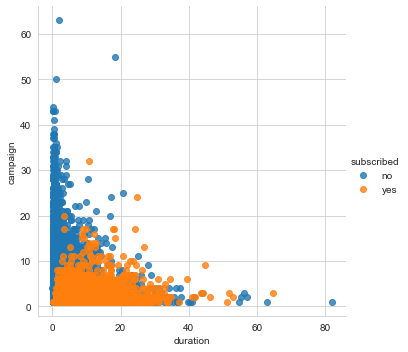

In [36]:
#Lets see how the duration and campaign affects our target variable
sns.lmplot(x='duration',y='campaign',hue='subscribed',data=train_df,fit_reg = False)

We can see that the duration is changed to minutes

# Data Cleaning
Here we will be cleaning the data which has unknown and other values present in our datasets.

In [37]:
#Seperating categorical and numerical columns

#checking for categorical columns
cat_col=[]
for i in train_df.dtypes.index:
    if train_df.dtypes[i]=="object":
        cat_col.append(i)
print("Categorical Columns: ",cat_col)
print('\n')

#checking for numerical columns
num_col=[]
for i in train_df.dtypes.index:
    if train_df.dtypes[i]!="object":
        num_col.append(i)
print("Numerical Columns: ",num_col)
print('\n')

Categorical Columns:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']


Numerical Columns:  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']




In [38]:
# We have 1288 other value present in poutcome from the train data lets remove these as it does not serve any purpose.
print("before removing other in poutcome from train data the shape is: ",train_df.shape)
condition1 = train_df.poutcome == 'other'
train_df.drop(train_df[condition1].index, axis = 0, inplace = True)
print(train_df['poutcome'].value_counts())
print("After removing other in poutcome from train data the shape is: ",train_df.shape)

before removing other in poutcome from train data the shape is:  (31647, 17)
unknown    25929
failure     3362
success     1068
Name: poutcome, dtype: int64
After removing other in poutcome from train data the shape is:  (30359, 17)


The unknown values are huge in poutcome hence we will not be treating it.

In [39]:
# We have 552 other value present in poutcome from the test data lets remove these as it does not serve any purpose.
print("before removing other in poutcome from test data the shape is: ",test_df.shape)
condition11 = test_df.poutcome == 'other'
test_df.drop(test_df[condition11].index, axis = 0, inplace = True)
print(test_df['poutcome'].value_counts())
print("After removing other in poutcome from train data the shape is: ",test_df.shape)

before removing other in poutcome from test data the shape is:  (13564, 16)
unknown    11030
failure     1539
success      443
Name: poutcome, dtype: int64
After removing other in poutcome from train data the shape is:  (13012, 16)


In [40]:
# so as to not lose data lets change the education and job unknown values to front fill method
train_df[['job','education']] = train_df[['job','education']].replace(['unknown'],np.nan)

In [41]:
train_df.isnull().sum() 

age              0
job            204
marital          0
education     1273
default          0
balance          0
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
subscribed       0
dtype: int64

In [42]:
# same way changing the unkown values in test data
test_df[['job','education']] = test_df[['job','education']].replace(['unknown'],np.nan)

In [43]:
test_df.isnull().sum() 

age            0
job           82
marital        0
education    519
default        0
balance        0
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64

In [44]:
train_df["job"].fillna(method='ffill',inplace=True)
train_df["education"].fillna(method='ffill',inplace=True)
test_df["job"].fillna(method='ffill',inplace=True)
test_df["education"].fillna(method='ffill',inplace=True)

In [45]:
train_df.isnull().sum() 

age           0
job           0
marital       0
education     1
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

We can still see one value missing in education lets use back fill method.

In [46]:
train_df["education"].fillna(method='bfill',inplace=True)

In [47]:
train_df.isnull().sum() 

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [48]:
test_df.isnull().sum() 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

# Transforming All Categorical Columns to Numercial Values

In [49]:
# job column
train_df['job'] = train_df['job'].replace(['blue-collar'],1)
train_df['job'] = train_df['job'].replace(['management'],2)
train_df['job'] = train_df['job'].replace(['technician'],3)
train_df['job'] = train_df['job'].replace(['admin.'],4)
train_df['job'] = train_df['job'].replace(['services'],5)
train_df['job'] = train_df['job'].replace(['retired'],6)
train_df['job'] = train_df['job'].replace(['self-employed'],7)
train_df['job'] = train_df['job'].replace(['entrepreneur'],8)
train_df['job'] = train_df['job'].replace(['unemployed'],9)
train_df['job'] = train_df['job'].replace(['housemaid'],10)
train_df['job'] = train_df['job'].replace(['student'],11)

# marital column
train_df['marital'] = train_df['marital'].replace(['single'],1)
train_df['marital'] = train_df['marital'].replace(['married'],2)
train_df['marital'] = train_df['marital'].replace(['divorced'],3)

# education column
train_df['education'] = train_df['education'].replace(['primary'],1)
train_df['education'] = train_df['education'].replace(['secondary'],2)
train_df['education'] = train_df['education'].replace(['tertiary'],3)

# default column
train_df['default'] = train_df['default'].replace(['yes'],1)
train_df['default'] = train_df['default'].replace(['no'],0)

# housing column
train_df['housing'] = train_df['housing'].replace(['yes'],1)
train_df['housing'] = train_df['housing'].replace(['no'],0)

# loan column
train_df['loan'] = train_df['loan'].replace(['yes'],1)
train_df['loan'] = train_df['loan'].replace(['no'],0)

# contact column
train_df['contact'] = train_df['contact'].replace(['cellular'],1)
train_df['contact'] = train_df['contact'].replace(['telephone'],2)
train_df['contact'] = train_df['contact'].replace(['unknown'],3)

# month column
train_df['month'] = train_df['month'].replace(['jan'],1)
train_df['month'] = train_df['month'].replace(['feb'],2)
train_df['month'] = train_df['month'].replace(['mar'],3)
train_df['month'] = train_df['month'].replace(['apr'],4)
train_df['month'] = train_df['month'].replace(['may'],5)
train_df['month'] = train_df['month'].replace(['jun'],6)
train_df['month'] = train_df['month'].replace(['jul'],7)
train_df['month'] = train_df['month'].replace(['aug'],8)
train_df['month'] = train_df['month'].replace(['sep'],9)
train_df['month'] = train_df['month'].replace(['oct'],10)
train_df['month'] = train_df['month'].replace(['nov'],11)
train_df['month'] = train_df['month'].replace(['dec'],12)

# poutcome column 
train_df['poutcome'] = train_df['poutcome'].replace(['failure'],0)
train_df['poutcome'] = train_df['poutcome'].replace(['success'],1)
train_df['poutcome'] = train_df['poutcome'].replace(['unknown'],2)

# subscribed column
train_df['subscribed'] = train_df['subscribed'].replace(['yes'],1)
train_df['subscribed'] = train_df['subscribed'].replace(['no'],0)


In [50]:
train_df.dtypes

age             int64
job             int64
marital         int64
education       int64
default         int64
balance         int64
housing         int64
loan            int64
contact         int64
day             int64
month           int64
duration      float64
campaign        int64
pdays           int64
previous        int64
poutcome        int64
subscribed      int64
dtype: object

As we can see it is changed to integers/numerical columns in the train data.

In [51]:
# Similarly to the test data

# job column
test_df['job'] = test_df['job'].replace(['blue-collar'],1)
test_df['job'] = test_df['job'].replace(['management'],2)
test_df['job'] = test_df['job'].replace(['technician'],3)
test_df['job'] = test_df['job'].replace(['admin.'],4)
test_df['job'] = test_df['job'].replace(['services'],5)
test_df['job'] = test_df['job'].replace(['retired'],6)
test_df['job'] = test_df['job'].replace(['self-employed'],7)
test_df['job'] = test_df['job'].replace(['entrepreneur'],8)
test_df['job'] = test_df['job'].replace(['unemployed'],9)
test_df['job'] = test_df['job'].replace(['housemaid'],10)
test_df['job'] = test_df['job'].replace(['student'],11)

# marital column
test_df['marital'] = test_df['marital'].replace(['single'],1)
test_df['marital'] = test_df['marital'].replace(['married'],2)
test_df['marital'] = test_df['marital'].replace(['divorced'],3)

# education column
test_df['education'] = test_df['education'].replace(['primary'],1)
test_df['education'] = test_df['education'].replace(['secondary'],2)
test_df['education'] = test_df['education'].replace(['tertiary'],3)

# default column
test_df['default'] = test_df['default'].replace(['yes'],1)
test_df['default'] = test_df['default'].replace(['no'],0)

# housing column
test_df['housing'] = test_df['housing'].replace(['yes'],1)
test_df['housing'] = test_df['housing'].replace(['no'],0)

# loan column
test_df['loan'] = test_df['loan'].replace(['yes'],1)
test_df['loan'] = test_df['loan'].replace(['no'],0)

# contact column
test_df['contact'] = test_df['contact'].replace(['cellular'],1)
test_df['contact'] = test_df['contact'].replace(['telephone'],2)
test_df['contact'] = test_df['contact'].replace(['unknown'],3)

# month column
test_df['month'] = test_df['month'].replace(['jan'],1)
test_df['month'] = test_df['month'].replace(['feb'],2)
test_df['month'] = test_df['month'].replace(['mar'],3)
test_df['month'] = test_df['month'].replace(['apr'],4)
test_df['month'] = test_df['month'].replace(['may'],5)
test_df['month'] = test_df['month'].replace(['jun'],6)
test_df['month'] = test_df['month'].replace(['jul'],7)
test_df['month'] = test_df['month'].replace(['aug'],8)
test_df['month'] = test_df['month'].replace(['sep'],9)
test_df['month'] = test_df['month'].replace(['oct'],10)
test_df['month'] = test_df['month'].replace(['nov'],11)
test_df['month'] = test_df['month'].replace(['dec'],12)

# poutcome column 
test_df['poutcome'] = test_df['poutcome'].replace(['failure'],0)
test_df['poutcome'] = test_df['poutcome'].replace(['success'],1)
test_df['poutcome'] = test_df['poutcome'].replace(['unknown'],2)


In [52]:
test_df.dtypes

age            int64
job            int64
marital        int64
education      int64
default        int64
balance        int64
housing        int64
loan           int64
contact        int64
day            int64
month          int64
duration     float64
campaign       int64
pdays          int64
previous       int64
poutcome       int64
dtype: object

In [53]:
train_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,4,2,2,0,1933,0,0,2,19,11,0.73,2,-1,0,2,0
1,31,4,2,2,0,3,0,0,1,20,7,1.52,2,-1,0,2,0
2,27,5,2,2,0,891,1,0,1,18,7,4.00,1,-1,0,2,0
3,57,2,3,3,0,3287,0,0,1,22,6,14.45,1,84,3,1,1
4,31,3,2,2,0,119,1,0,1,4,2,6.33,1,-1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,2,1,3,0,0,1,0,1,12,5,1.93,2,-1,0,2,0
31643,53,2,3,3,0,380,0,1,1,5,6,7.30,2,-1,0,2,1
31644,32,2,1,3,0,312,0,0,1,7,8,0.62,3,-1,0,2,0
31645,57,3,2,2,0,225,1,0,2,15,5,0.37,7,337,12,0,0


In [54]:
test_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,5,2,2,0,118,1,0,1,15,5,0.33,6,-1,0,2
1,78,6,3,1,0,2787,0,0,2,1,7,6.20,1,-1,0,2
2,31,7,1,3,0,144,1,0,3,16,5,11.27,1,-1,0,2
3,57,5,1,1,0,3777,1,0,2,13,5,1.08,2,-1,0,2
4,45,1,3,2,0,-705,0,1,3,3,7,1.85,1,-1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,2,2,3,0,45,0,0,1,28,8,2.47,4,-1,0,2
13560,54,1,2,1,0,2281,1,0,3,20,6,2.63,1,-1,0,2
13561,35,6,2,1,0,285,1,0,1,29,1,2.27,1,-1,0,2
13562,29,4,1,2,0,464,0,0,1,9,11,3.47,2,91,3,1


# Checking For outliers

In [55]:
numerical_cols=train_df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]

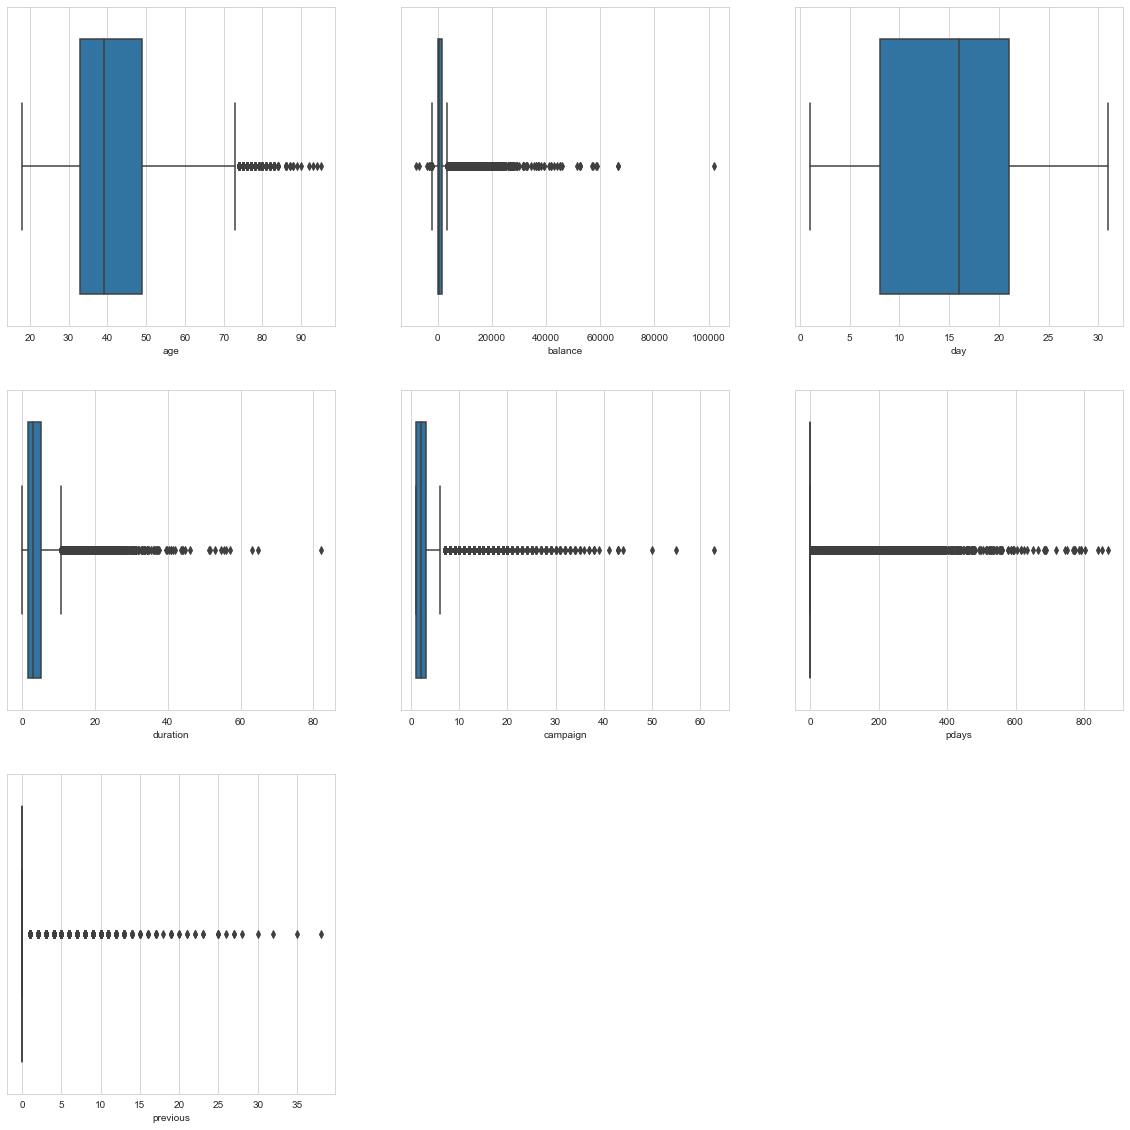

In [56]:
plt.figure(figsize=(20,20))
for i in enumerate(numerical_cols.columns):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(numerical_cols[i[1]])

As we can see that their are outliers present in our numerical columns except for day column.

#### Zscore Method

In [57]:
from scipy.stats import zscore
z=np.abs(zscore(numerical_cols))
z

,age,balance,day,duration,campaign,pdays,previous
0,1.416961,0.191181,0.373881,0.832694,0.246720,0.362639,0.283564
1,0.943392,0.450733,0.493822,0.648623,0.246720,0.362639,0.283564
2,1.321048,0.155386,0.253939,0.070781,0.563563,0.362639,0.283564
3,1.511375,0.641519,0.733704,2.364077,0.563563,0.584978,1.713047
4,0.943392,0.412152,1.425238,0.472111,0.563563,0.362639,0.283564
...,...,...,...,...,...,...,...
31642,1.132220,0.451731,0.465708,0.553093,0.246720,0.362639,0.283564
31643,1.133719,0.325344,1.305297,0.698121,0.246720,0.362639,0.283564
31644,0.848977,0.347960,1.065415,0.858324,0.070123,0.362639,0.283564
31645,1.511375,0.376896,0.105884,0.916574,1.337496,3.405532,7.702881


In [58]:
threshold=3
print(np.where(z>3))

(array([   21,    26,    35, ..., 30357, 30357, 30358], dtype=int64), array([4, 1, 5, ..., 5, 6, 3], dtype=int64))


In [59]:
z.iloc[21][4]

9.575416015382748

In [60]:
train_df1=train_df[(z<3).all(axis=1)]
print(train_df.shape)
print(train_df1.shape)

(30359, 17)
(26639, 17)


In [61]:
# Data loss percentage using zscore method
a=((30359-26639)/30359)*100
a

12.253368029249975

#### IQR Method

In [62]:
Q1 = numerical_cols.quantile(0.25)
Q3 = numerical_cols.quantile(0.75)
IQR=Q3-Q1
train_df2=numerical_cols[~((numerical_cols < (Q1 - 1.5 * IQR)) | (numerical_cols > (Q3 + 1.5 * IQR))).any(axis=1)]
train_df2.shape

(19823, 7)

In [63]:
# Data loss percentage using IQR method
b=((30359-19823)/30359)*100
b

34.70470041832735

The Data loss percentage is 12.25% using zscore and 34.7% using IQR. Only 10% of data loss is acceptable. Lets change the threshold value such that there is loss of data not more than 10%.

In [64]:
threshold=3.3
print(np.where(z>3.3))

(array([   21,    26,    35, ..., 30357, 30357, 30358], dtype=int64), array([4, 1, 5, ..., 5, 6, 3], dtype=int64))


In [65]:
train_df1=train_df[(z<3.3).all(axis=1)]
print(train_df.shape)
print(train_df1.shape)

(30359, 17)
(27347, 17)


In [66]:
# Data loss percentage using zscore method when threshold value is 3.3
a=((30359-27347)/30359)*100
a

9.921275404328206

Here the loss is under 10%

In [67]:
train_df=train_df1
train_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,4,2,2,0,1933,0,0,2,19,11,0.73,2,-1,0,2,0
1,31,4,2,2,0,3,0,0,1,20,7,1.52,2,-1,0,2,0
2,27,5,2,2,0,891,1,0,1,18,7,4.00,1,-1,0,2,0
3,57,2,3,3,0,3287,0,0,1,22,6,14.45,1,84,3,1,1
4,31,3,2,2,0,119,1,0,1,4,2,6.33,1,-1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,43,2,1,2,0,2968,0,0,3,20,6,0.50,4,-1,0,2,0
31641,37,3,1,3,0,1309,0,0,3,6,6,7.37,2,-1,0,2,0
31642,29,2,1,3,0,0,1,0,1,12,5,1.93,2,-1,0,2,0
31643,53,2,3,3,0,380,0,1,1,5,6,7.30,2,-1,0,2,1


# Checking for skewness

In [68]:
numerical_cols=train_df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
numerical_cols.skew()

age         0.474825
balance     2.517871
day         0.067330
duration    1.698821
campaign    2.207771
pdays       3.345094
previous    3.947774
dtype: float64

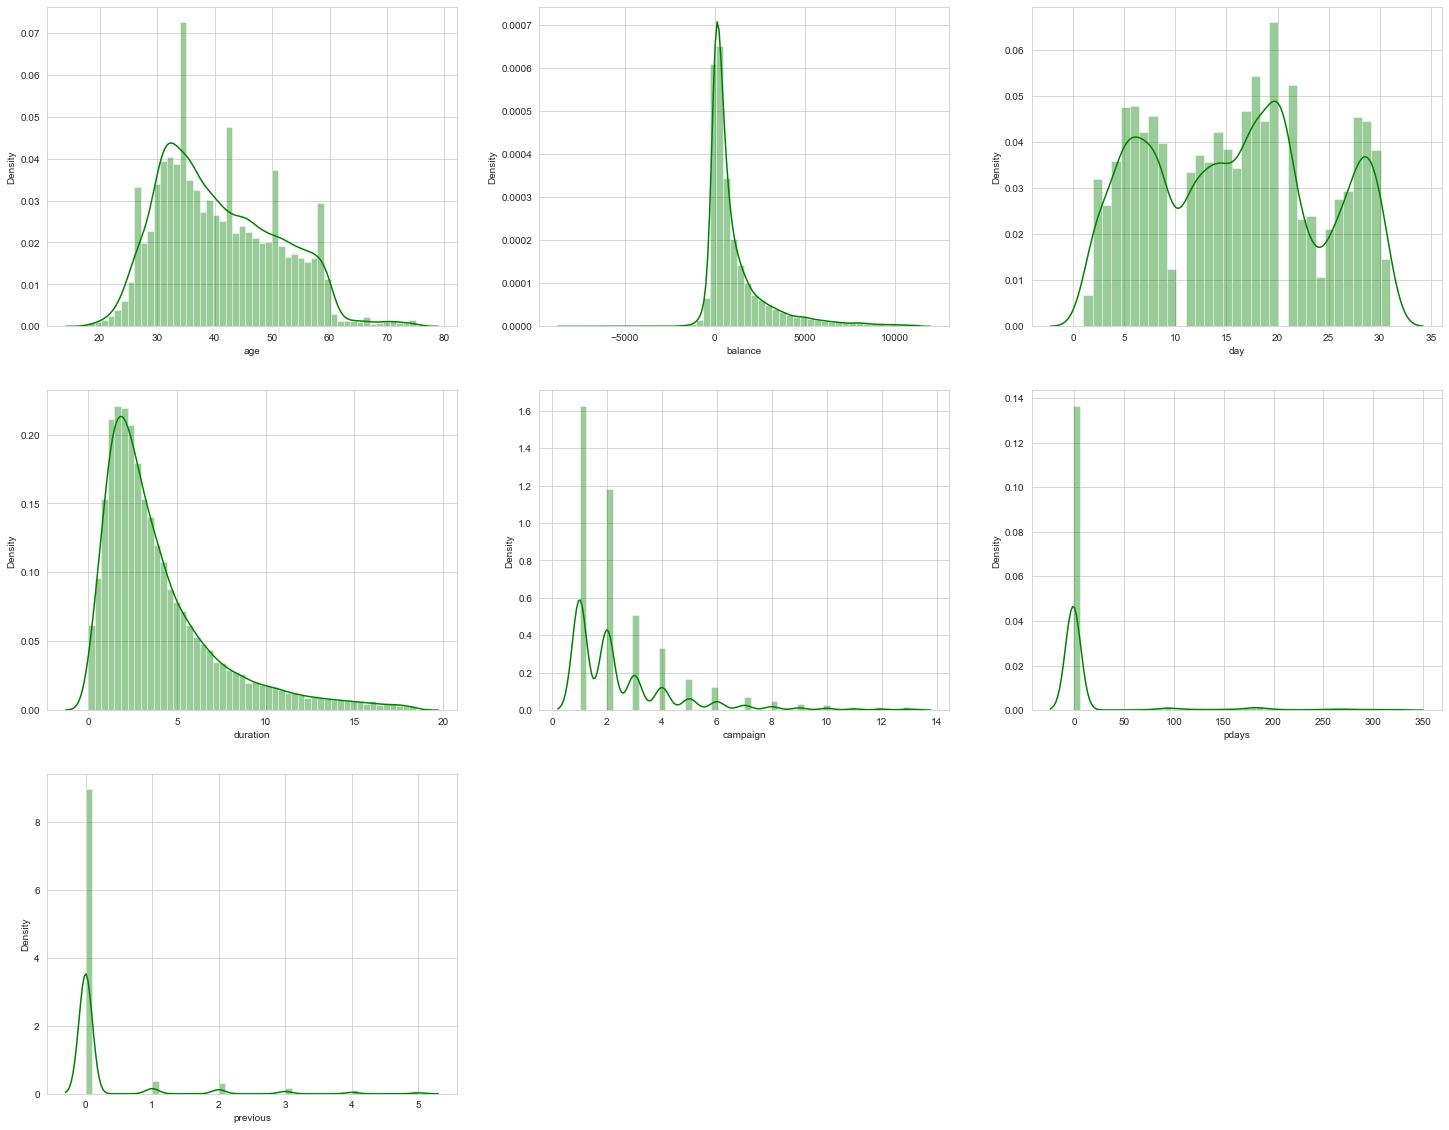

In [69]:
plt.figure(figsize=(25,20))
for i in enumerate(numerical_cols):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(numerical_cols[i[1]],color='g')

As we can see there is some skewness present in

1. balance
2. duration
3. campaign
4. pdays
5. previous

In [70]:
# using power transform method
from sklearn.preprocessing import power_transform
train_df[['balance','duration','campaign','pdays','previous']]=power_transform(train_df[['balance','duration','campaign','pdays','previous']],method='yeo-johnson')

In [71]:
numerical_cols=train_df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
numerical_cols.skew()

age         0.474825
balance    -0.202865
day         0.067330
duration    0.013700
campaign    0.207250
pdays       2.594258
previous    2.594068
dtype: float64

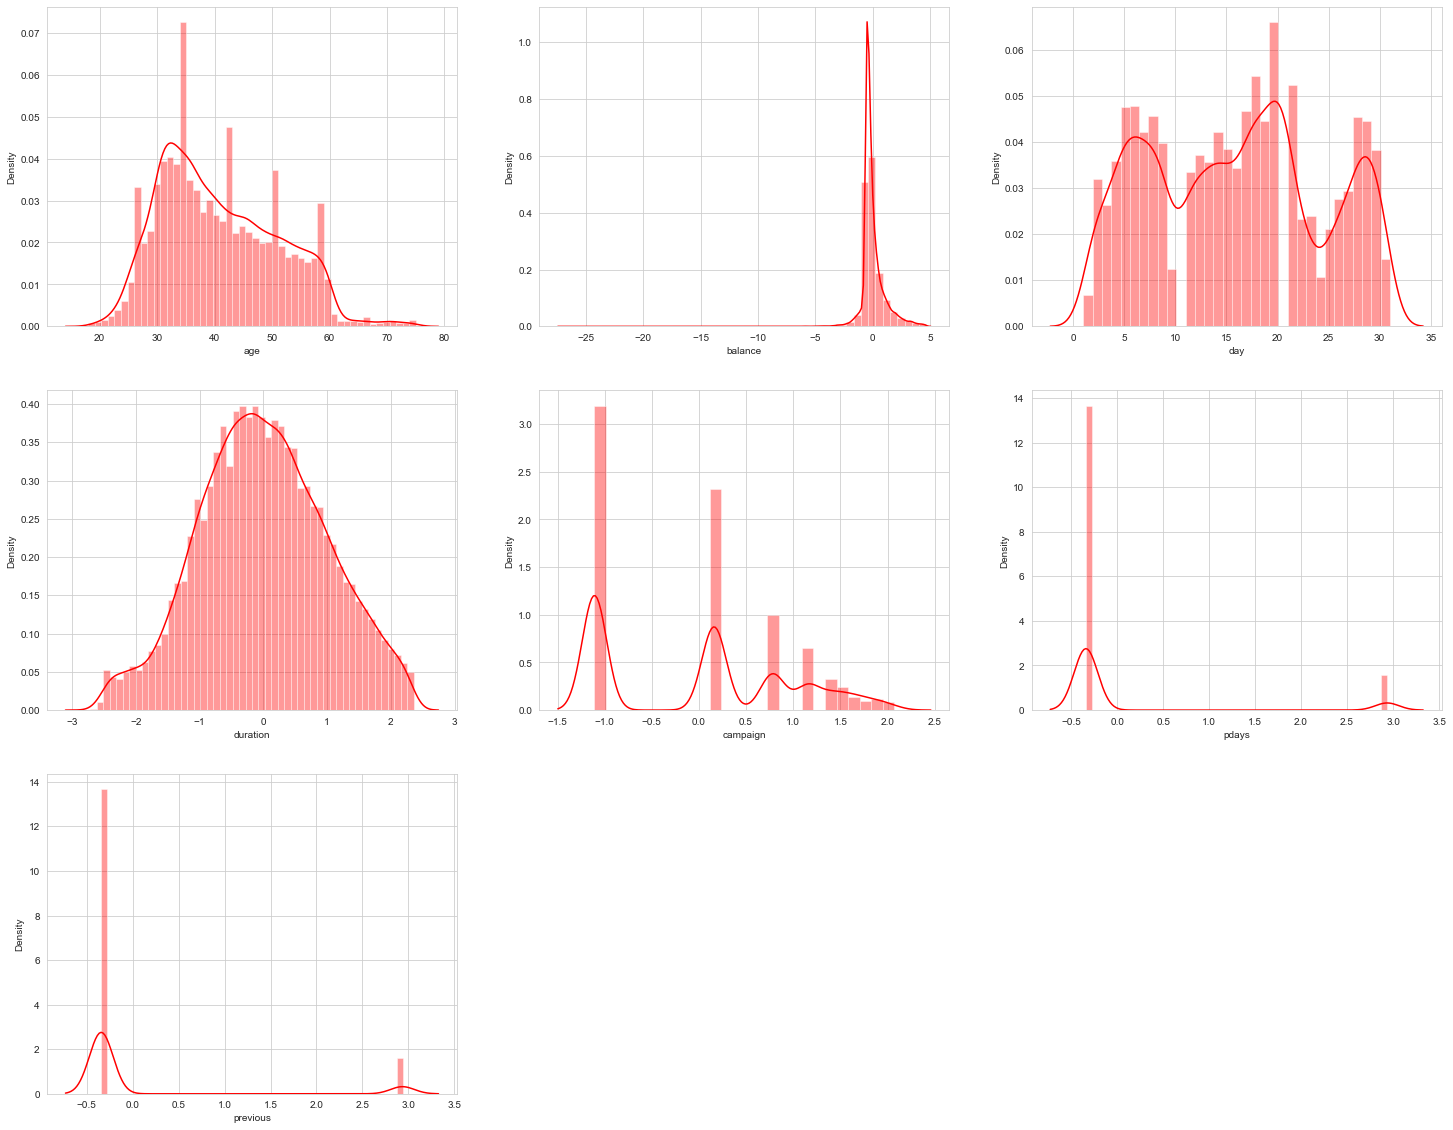

In [72]:
plt.figure(figsize=(25,20))
for i in enumerate(numerical_cols):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(numerical_cols[i[1]],color='r')

We have removed skewness from the numerical columns

# Correlation between variables

In [73]:
train_dfcor=train_df.corr()
train_dfcor

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,0.055268,0.408421,-0.146992,-0.010709,0.088982,-0.163251,0.000197,0.024509,-0.009620,0.095655,-0.031520,0.039632,0.009818,0.009774,-0.009111,0.001008
job,0.055268,1.000000,-0.026971,-0.013545,0.006789,0.026292,-0.153109,-0.030139,-0.052319,-0.009895,0.006109,-0.001536,-0.026365,0.029362,0.029346,-0.020957,0.056430
marital,0.408421,-0.026971,1.000000,-0.116790,0.010546,-0.019498,0.024715,0.043404,0.039901,0.007786,0.054666,-0.019801,0.038581,-0.016976,-0.017012,0.010262,-0.056089
education,-0.146992,-0.013545,-0.116790,1.000000,-0.008108,0.049309,-0.086488,-0.028802,-0.160825,0.018578,0.068986,0.003024,-0.010251,0.063855,0.063902,-0.052458,0.076661
default,-0.010709,0.006789,0.010546,-0.008108,1.000000,-0.166122,-0.013725,0.081763,0.011655,0.008143,0.016260,-0.002821,0.013069,-0.037803,-0.037813,0.035305,-0.015949
balance,0.088982,0.026292,-0.019498,0.049309,-0.166122,1.000000,-0.077320,-0.126475,-0.045365,-0.003499,0.087403,0.020073,-0.020402,0.073098,0.073081,-0.067343,0.073339
housing,-0.163251,-0.153109,0.024715,-0.086488,-0.013725,-0.077320,1.000000,0.032803,0.226378,-0.015472,-0.166937,0.016384,-0.047830,-0.001060,-0.001129,-0.027424,-0.141281
loan,0.000197,-0.030139,0.043404,-0.028802,0.081763,-0.126475,0.032803,1.000000,-0.014205,0.013502,0.032104,-0.004792,0.000502,-0.015893,-0.015975,0.003045,-0.070146
contact,0.024509,-0.052319,0.039901,-0.160825,0.011655,-0.045365,0.226378,-0.014205,1.000000,-0.035814,-0.205106,-0.034117,-0.007878,-0.233654,-0.233665,0.224983,-0.157820
day,-0.009620,-0.009895,0.007786,0.018578,0.008143,-0.003499,-0.015472,0.013502,-0.035814,1.000000,0.094689,-0.047571,0.134293,-0.041137,-0.041247,0.040063,-0.029617


<AxesSubplot:>

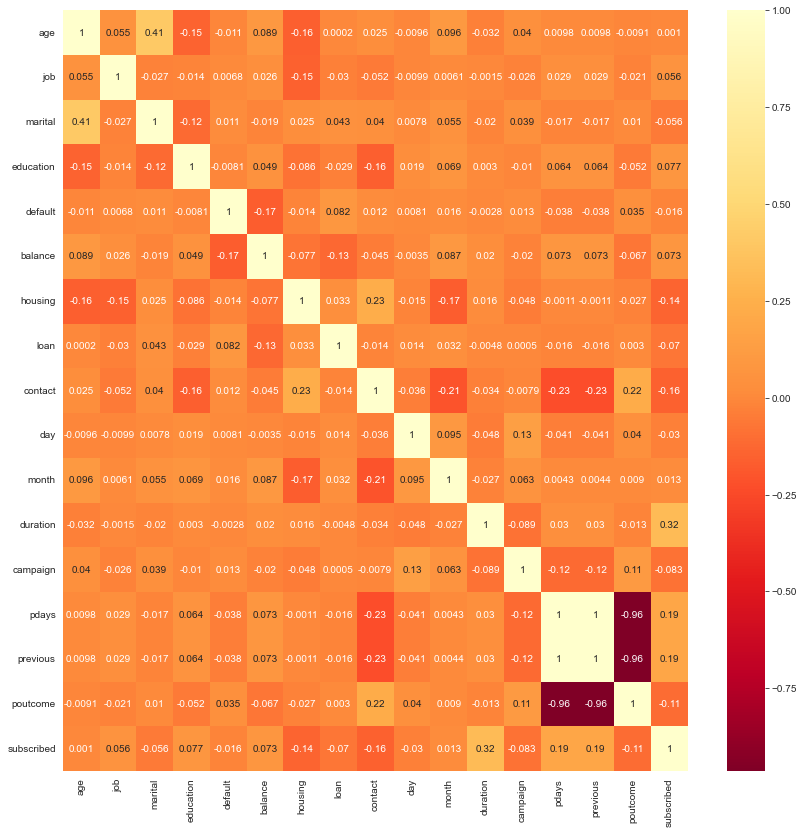

In [74]:
plt.figure(figsize=(14,14))
sns.heatmap(train_dfcor,cmap='YlOrRd_r',annot=True)

Observations:
1. Previous and pdays are exactly correlated to each other. Also their realtionship with the target variable is the same. We can remove any one of them.
2. poutcome is highly negatively correlated to pdays and previous columns.

## Checking Multicolinearity

In [75]:
#Splitting the data
x= train_df.drop(['subscribed'], axis=1)

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["faetures"]=x.columns
    print(vif)

In [77]:
vif_calc()

      VIF Factor   faetures
0      20.604312        age
1       3.027520        job
2      12.358199    marital
3      11.296506  education
4       1.055484    default
5       1.070849    balance
6       2.428817    housing
7       1.229726       loan
8       5.097065    contact
9       4.679517        day
10      8.355541      month
11      1.015611   duration
12      1.046218   campaign
13  22596.182790      pdays
14  22579.332933   previous
15     45.969891   poutcome


As we can see the pdays and previous have large VIF values. We can remove pdays from the train dataset. But, before removing it lets check for correlation of test data too. 

In [78]:
test_dfcor=test_df.corr()
test_dfcor

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
age,1.000000,0.064742,0.394766,-0.169478,-0.023803,0.082334,-0.192481,-0.027111,0.020093,-0.007350,0.079848,-0.008731,0.000154,-0.005073,0.010581,-0.007976
job,0.064742,1.000000,-0.015399,-0.027858,-0.011918,0.007667,-0.161968,-0.016008,-0.043646,-0.006375,0.015581,0.017830,-0.036030,-0.028636,-0.003680,0.014262
marital,0.394766,-0.015399,1.000000,-0.118162,0.000798,-0.001360,0.010061,0.055440,0.035394,-0.000399,0.049536,-0.011221,0.006589,-0.006950,-0.015493,0.004554
education,-0.169478,-0.027858,-0.118162,1.000000,-0.024713,0.065430,-0.064225,-0.025660,-0.154603,0.037034,0.075196,-0.008185,0.008354,0.010167,0.043401,-0.033436
default,-0.023803,-0.011918,0.000798,-0.024713,1.000000,-0.061198,0.008673,0.068280,0.016576,0.007617,0.015934,-0.007446,0.011919,-0.026645,-0.020802,0.030851
balance,0.082334,0.007667,-0.001360,0.065430,-0.061198,1.000000,-0.068755,-0.085370,-0.034638,0.003099,0.091387,0.013090,-0.018874,0.009845,0.025307,-0.027862
housing,-0.192481,-0.161968,0.010061,-0.064225,0.008673,-0.068755,1.000000,0.050899,0.185243,-0.030616,-0.173634,0.013890,-0.030155,0.117295,0.036890,-0.098004
loan,-0.027111,-0.016008,0.055440,-0.025660,0.068280,-0.085370,0.050899,1.000000,-0.016817,0.002206,0.024395,-0.012124,0.011075,-0.029308,-0.024449,0.029442
contact,0.020093,-0.043646,0.035394,-0.154603,0.016576,-0.034638,0.185243,-0.016817,1.000000,-0.035904,-0.188744,-0.029541,0.009029,-0.229494,-0.162214,0.258796
day,-0.007350,-0.006375,-0.000399,0.037034,0.007617,0.003099,-0.030616,0.002206,-0.035904,1.000000,0.106630,-0.027750,0.176499,-0.096085,-0.053143,0.090587


<AxesSubplot:>

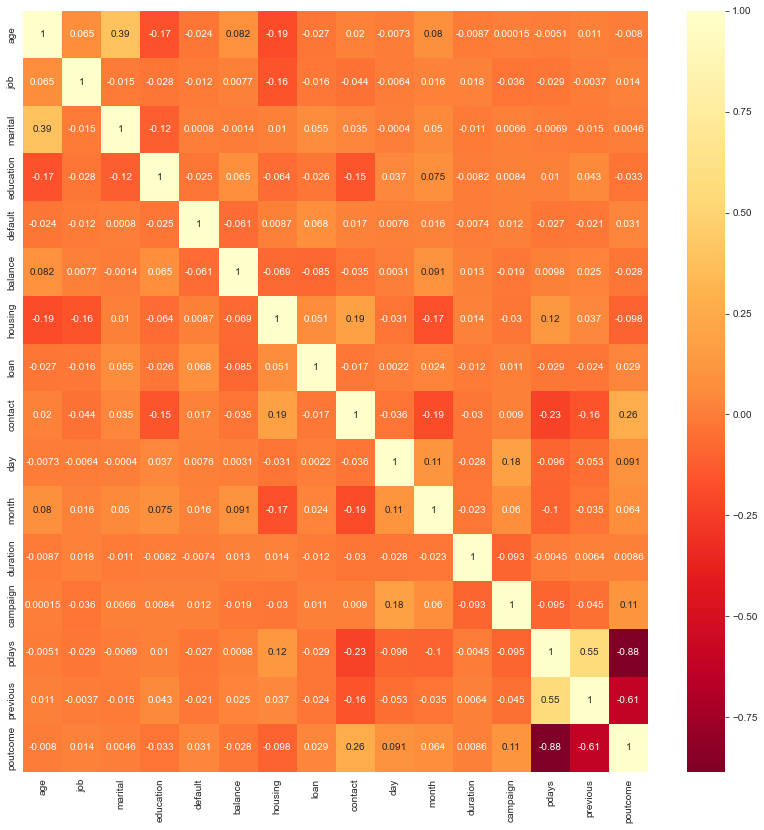

In [79]:
plt.figure(figsize=(14,14))
sns.heatmap(test_dfcor,cmap='YlOrRd_r',annot=True)

As we can see here the pdays and previous have moderate correlation. We can remove pdays from the train and test datasets.

In [80]:
train_df.drop('pdays',axis=1,inplace=True)

In [81]:
test_df.drop('pdays',axis=1,inplace=True)

In [82]:
train_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,subscribed
0,56,4,2,2,0,0.547263,0,0,2,19,11,-1.567266,0.159671,-0.340753,2,0
1,31,4,2,2,0,-0.557967,0,0,1,20,7,-0.842531,0.159671,-0.340753,2,0
2,27,5,2,2,0,-0.000850,1,0,1,18,7,0.360674,-1.108803,-0.340753,2,0
3,57,2,3,3,0,1.207676,0,0,1,22,6,2.051872,-1.108803,2.937574,1,1
4,31,3,2,2,0,-0.466561,1,0,1,4,2,0.972045,-1.108803,-0.340753,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,43,2,1,2,0,1.055659,0,0,3,20,6,-1.854903,1.150440,-0.340753,2,0
31641,37,3,1,3,0,0.225189,0,0,3,6,6,1.174677,0.159671,-0.340753,2,0
31642,29,2,1,3,0,-0.561371,1,0,1,12,5,-0.565257,0.159671,-0.340753,2,0
31643,53,2,3,3,0,-0.296903,0,1,1,5,6,1.161990,0.159671,-0.340753,2,1


In [83]:
test_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,32,5,2,2,0,118,1,0,1,15,5,0.33,6,0,2
1,78,6,3,1,0,2787,0,0,2,1,7,6.20,1,0,2
2,31,7,1,3,0,144,1,0,3,16,5,11.27,1,0,2
3,57,5,1,1,0,3777,1,0,2,13,5,1.08,2,0,2
4,45,1,3,2,0,-705,0,1,3,3,7,1.85,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,2,2,3,0,45,0,0,1,28,8,2.47,4,0,2
13560,54,1,2,1,0,2281,1,0,3,20,6,2.63,1,0,2
13561,35,6,2,1,0,285,1,0,1,29,1,2.27,1,0,2
13562,29,4,1,2,0,464,0,0,1,9,11,3.47,2,3,1


In [84]:
train_df.reset_index(drop=True,inplace=True)
test_df.reset_index(drop=True,inplace=True)

0    24580
1     2767
Name: subscribed, dtype: int64


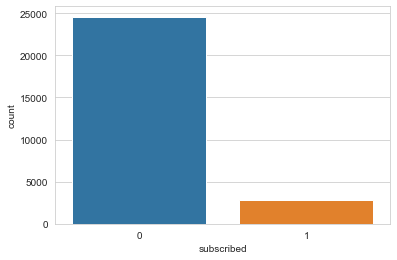

In [85]:
sns.countplot(train_df['subscribed'])
print(train_df.subscribed.value_counts())

# Feature Scaling using MinMax Scaler

In [86]:
#Splitting the data
x= train_df.drop(['subscribed'], axis=1)
y= train_df['subscribed']

In [87]:
from sklearn.preprocessing import MinMaxScaler
st=MinMaxScaler()
x=pd.DataFrame(st.fit_transform(x))
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.666667,0.3,0.5,0.5,0.0,0.869983,0.0,0.0,0.5,0.600000,0.909091,0.225938,0.398951,0.000000,1.0
1,0.228070,0.3,0.5,0.5,0.0,0.835156,0.0,0.0,0.0,0.633333,0.545455,0.368866,0.398951,0.000000,1.0
2,0.157895,0.4,0.5,0.5,0.0,0.852711,1.0,0.0,0.0,0.566667,0.545455,0.606155,0.000000,0.000000,1.0
3,0.684211,0.1,1.0,1.0,0.0,0.890793,0.0,0.0,0.0,0.700000,0.454545,0.939683,0.000000,0.999995,0.5
4,0.228070,0.2,0.5,0.5,0.0,0.838036,1.0,0.0,0.0,0.100000,0.090909,0.726726,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27342,0.438596,0.1,0.0,0.5,0.0,0.886003,0.0,0.0,1.0,0.633333,0.454545,0.169212,0.710560,0.000000,1.0
27343,0.333333,0.2,0.0,1.0,0.0,0.859834,0.0,0.0,1.0,0.166667,0.454545,0.766688,0.398951,0.000000,1.0
27344,0.192982,0.1,0.0,1.0,0.0,0.835049,1.0,0.0,0.0,0.366667,0.363636,0.423548,0.398951,0.000000,1.0
27345,0.614035,0.1,1.0,1.0,0.0,0.843382,0.0,1.0,0.0,0.133333,0.454545,0.764186,0.398951,0.000000,1.0


In [88]:
x.columns=['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','previous','']
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,0.666667,0.3,0.5,0.5,0.0,0.869983,0.0,0.0,0.5,0.600000,0.909091,0.225938,0.398951,0.000000,1.0
1,0.228070,0.3,0.5,0.5,0.0,0.835156,0.0,0.0,0.0,0.633333,0.545455,0.368866,0.398951,0.000000,1.0
2,0.157895,0.4,0.5,0.5,0.0,0.852711,1.0,0.0,0.0,0.566667,0.545455,0.606155,0.000000,0.000000,1.0
3,0.684211,0.1,1.0,1.0,0.0,0.890793,0.0,0.0,0.0,0.700000,0.454545,0.939683,0.000000,0.999995,0.5
4,0.228070,0.2,0.5,0.5,0.0,0.838036,1.0,0.0,0.0,0.100000,0.090909,0.726726,0.000000,0.000000,1.0


In [89]:
print(y.value_counts())

0    24580
1     2767
Name: subscribed, dtype: int64


# Resampling using SMOTE

In [90]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [91]:
y.value_counts()

0    24580
1    24580
Name: subscribed, dtype: int64

Now the Data is balanced

# Model

Finding the best random state

In [92]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [94]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    RF = RandomForestClassifier()
    RF.fit(x_train,y_train)
    pred=RF.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best Accuracy is ",maxAccu," At random state ",maxRS)

Best Accuracy is  0.9593165174938975  At random state  25


### Spliting Train and Test Data

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=maxRS)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(39328, 15)
(9832, 15)
(39328,)
(9832,)


# Finding the best Model

In [96]:
# Importing necessary Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#### 1. Gaussian Naive Bayes

In [97]:
GNB=GaussianNB()
GNB.fit(x_train,y_train)
predGNB=GNB.predict(x_test)
print(accuracy_score(y_test,predGNB))
print(confusion_matrix(y_test,predGNB))
print(classification_report(y_test,predGNB))
print("Training accuracy::",GNB.score(x_train,y_train))
print("Test accuracy::",GNB.score(x_test,y_test))

0.769426362896664
[[3685 1262]
 [1005 3880]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.76      4947
           1       0.75      0.79      0.77      4885

    accuracy                           0.77      9832
   macro avg       0.77      0.77      0.77      9832
weighted avg       0.77      0.77      0.77      9832

Training accuracy:: 0.764569772172498
Test accuracy:: 0.769426362896664


#### 2. Decision Tree Classifier

In [98]:
print('DTC for Gini')
DTC1=DecisionTreeClassifier(criterion='gini')
DTC1.fit(x_train,y_train)
predDTC1=DTC1.predict(x_test)
print(accuracy_score(y_test,predDTC1))
print(confusion_matrix(y_test,predDTC1))
print(classification_report(y_test,predDTC1))
print("Training accuracy::",DTC1.score(x_train,y_train))
print("Test accuracy::",DTC1.score(x_test,y_test))
print('\n')

print('DTC for Entropy')
DTC2=DecisionTreeClassifier(criterion='entropy')
DTC2.fit(x_train,y_train)
predDTC2=DTC2.predict(x_test)
print(accuracy_score(y_test,predDTC2))
print(confusion_matrix(y_test,predDTC2))
print(classification_report(y_test,predDTC2))
print("Training accuracy::",DTC2.score(x_train,y_train))
print("Test accuracy::",DTC2.score(x_test,y_test))

DTC for Gini
0.9147681041497152
[[4519  428]
 [ 410 4475]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      4947
           1       0.91      0.92      0.91      4885

    accuracy                           0.91      9832
   macro avg       0.91      0.91      0.91      9832
weighted avg       0.91      0.91      0.91      9832

Training accuracy:: 1.0
Test accuracy:: 0.9147681041497152


DTC for Entropy
0.9188364524003255
[[4521  426]
 [ 372 4513]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      4947
           1       0.91      0.92      0.92      4885

    accuracy                           0.92      9832
   macro avg       0.92      0.92      0.92      9832
weighted avg       0.92      0.92      0.92      9832

Training accuracy:: 1.0
Test accuracy:: 0.9188364524003255


DTC is working better with Entropy criterion

In [99]:
DTC=DecisionTreeClassifier(criterion='entropy')
DTC.fit(x_train,y_train)
predDTC=DTC.predict(x_test)
print(accuracy_score(y_test,predDTC))
print(confusion_matrix(y_test,predDTC))
print(classification_report(y_test,predDTC))
print("Training accuracy::",DTC.score(x_train,y_train))
print("Test accuracy::",DTC.score(x_test,y_test))

0.9213791700569569
[[4526  421]
 [ 352 4533]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      4947
           1       0.92      0.93      0.92      4885

    accuracy                           0.92      9832
   macro avg       0.92      0.92      0.92      9832
weighted avg       0.92      0.92      0.92      9832

Training accuracy:: 1.0
Test accuracy:: 0.9213791700569569


#### 3. KNeighbors Classifier

In [100]:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
predKNN=KNN.predict(x_test)
print(accuracy_score(y_test,predKNN))
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))
print("Training accuracy::",KNN.score(x_train,y_train))
print("Test accuracy::",KNN.score(x_test,y_test))

0.9126322213181448
[[4134  813]
 [  46 4839]]
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      4947
           1       0.86      0.99      0.92      4885

    accuracy                           0.91      9832
   macro avg       0.92      0.91      0.91      9832
weighted avg       0.92      0.91      0.91      9832

Training accuracy:: 0.9397630187144019
Test accuracy:: 0.9126322213181448


#### 4. Support Vector Classifier

In [101]:
print('SV for rbf')
SV1=SVC(kernel='rbf')
SV1.fit(x_train,y_train)
predSV1=SV1.predict(x_test)
print(accuracy_score(y_test,predSV1))
print(confusion_matrix(y_test,predSV1))
print(classification_report(y_test,predSV1))
print("Training accuracy::",SV1.score(x_train,y_train))
print("Test accuracy::",SV1.score(x_test,y_test))
print('\n')

print('SV for poly')
SV2=SVC(kernel='poly')
SV2.fit(x_train,y_train)
predSV2=SV2.predict(x_test)
print(accuracy_score(y_test,predSV2))
print(confusion_matrix(y_test,predSV2))
print(classification_report(y_test,predSV2))
print("Training accuracy::",SV2.score(x_train,y_train))
print("Test accuracy::",SV2.score(x_test,y_test))
print('\n')

print('SV for linear')
SV3=SVC(kernel='linear')
SV3.fit(x_train,y_train)
predSV3=SV3.predict(x_test)
print(accuracy_score(y_test,predSV3))
print(confusion_matrix(y_test,predSV3))
print(classification_report(y_test,predSV3))
print("Training accuracy::",SV3.score(x_train,y_train))
print("Test accuracy::",SV3.score(x_test,y_test))

SV for rbf
0.8675752644426363
[[3996  951]
 [ 351 4534]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      4947
           1       0.83      0.93      0.87      4885

    accuracy                           0.87      9832
   macro avg       0.87      0.87      0.87      9832
weighted avg       0.87      0.87      0.87      9832

Training accuracy:: 0.8663801871440195
Test accuracy:: 0.8675752644426363


SV for poly
0.8628966639544345
[[3979  968]
 [ 380 4505]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.86      4947
           1       0.82      0.92      0.87      4885

    accuracy                           0.86      9832
   macro avg       0.87      0.86      0.86      9832
weighted avg       0.87      0.86      0.86      9832

Training accuracy:: 0.8640154597233524
Test accuracy:: 0.8628966639544345


SV for linear
0.8270951993490643
[[3939 1008]
 [ 692 4193]]
              preci

for SVC rbf and poly are working better lets select rbf.

In [102]:
SV=SVC(kernel='rbf')
SV.fit(x_train,y_train)
predSV=SV.predict(x_test)
print(accuracy_score(y_test,predSV))
print(confusion_matrix(y_test,predSV))
print(classification_report(y_test,predSV))
print("Training accuracy::",SV.score(x_train,y_train))
print("Test accuracy::",SV.score(x_test,y_test))

0.8675752644426363
[[3996  951]
 [ 351 4534]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      4947
           1       0.83      0.93      0.87      4885

    accuracy                           0.87      9832
   macro avg       0.87      0.87      0.87      9832
weighted avg       0.87      0.87      0.87      9832

Training accuracy:: 0.8663801871440195
Test accuracy:: 0.8675752644426363


#### 5. Random Forest Classifier

In [103]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
predRF=RF.predict(x_test)
print(accuracy_score(y_test,predRF))
print(confusion_matrix(y_test,predRF))
print(classification_report(y_test,predRF))
print("Training accuracy::",RF.score(x_train,y_train))
print("Test accuracy::",RF.score(x_test,y_test))

0.9579943043124491
[[4629  318]
 [  95 4790]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      4947
           1       0.94      0.98      0.96      4885

    accuracy                           0.96      9832
   macro avg       0.96      0.96      0.96      9832
weighted avg       0.96      0.96      0.96      9832

Training accuracy:: 1.0
Test accuracy:: 0.9579943043124491


#### 6. Ada Boost Classifier

In [104]:
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))
print("Training accuracy::",ABC.score(x_train,y_train))
print("Test accuracy::",ABC.score(x_test,y_test))

0.8911716842961758
[[4361  586]
 [ 484 4401]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4947
           1       0.88      0.90      0.89      4885

    accuracy                           0.89      9832
   macro avg       0.89      0.89      0.89      9832
weighted avg       0.89      0.89      0.89      9832

Training accuracy:: 0.8857048413344182
Test accuracy:: 0.8911716842961758


#### 7. Bagging Classifier

In [105]:
BC = BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))
print("Training accuracy::",BC.score(x_train,y_train))
print("Test accuracy::",BC.score(x_test,y_test))

0.9427379983726607
[[4631  316]
 [ 247 4638]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      4947
           1       0.94      0.95      0.94      4885

    accuracy                           0.94      9832
   macro avg       0.94      0.94      0.94      9832
weighted avg       0.94      0.94      0.94      9832

Training accuracy:: 0.996923311635476
Test accuracy:: 0.9427379983726607


#### 8. Gradient Boosting Classifier

In [106]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
predGBC=GBC.predict(x_test)
print(accuracy_score(y_test,predGBC))
print(confusion_matrix(y_test,predGBC))
print(classification_report(y_test,predGBC))
print("Training accuracy::",GBC.score(x_train,y_train))
print("Test accuracy::",GBC.score(x_test,y_test))

0.9185313262815297
[[4418  529]
 [ 272 4613]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      4947
           1       0.90      0.94      0.92      4885

    accuracy                           0.92      9832
   macro avg       0.92      0.92      0.92      9832
weighted avg       0.92      0.92      0.92      9832

Training accuracy:: 0.918073637103336
Test accuracy:: 0.9185313262815297


#### 9. Extra Trees Classifier

In [107]:
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))
print("Training accuracy::",ET.score(x_train,y_train))
print("Test accuracy::",ET.score(x_test,y_test))

0.9647070789259561
[[4643  304]
 [  43 4842]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      4947
           1       0.94      0.99      0.97      4885

    accuracy                           0.96      9832
   macro avg       0.97      0.96      0.96      9832
weighted avg       0.97      0.96      0.96      9832

Training accuracy:: 1.0
Test accuracy:: 0.9647070789259561


#### 10. Logistic Regression

In [108]:
LG=LogisticRegression()
LG.fit(x_train,y_train)
predLG=LG.predict(x_test)
print(accuracy_score(y_test,predLG))
print(confusion_matrix(y_test,predLG))
print(classification_report(y_test,predLG))
print("Training accuracy::",LG.score(x_train,y_train))
print("Test accuracy::",LG.score(x_test,y_test))

0.8243490642799024
[[4001  946]
 [ 781 4104]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      4947
           1       0.81      0.84      0.83      4885

    accuracy                           0.82      9832
   macro avg       0.82      0.82      0.82      9832
weighted avg       0.82      0.82      0.82      9832

Training accuracy:: 0.8203061432058584
Test accuracy:: 0.8243490642799024


The Random forest and Extra Tree Classifiers are working well for our data.

## Cross Validation to avoid overfitting and underfitting

In [109]:
from sklearn.model_selection import cross_val_score
GNB_score=cross_val_score(GNB,x,y,scoring='accuracy')
print("GaussianNB mean cv = ",np.mean(GNB_score))

GaussianNB mean cv =  0.7651545972335233


In [110]:
DTC_score=cross_val_score(DTC,x,y,scoring='accuracy')
print("Decision Tree mean cv = ",np.mean(DTC_score))

Decision Tree mean cv =  0.9143409275834011


In [111]:
KNN_score=cross_val_score(KNN,x,y,scoring='accuracy')
print("KNeighbor Classifier mean cv = ",np.mean(KNN_score))

KNeighbor Classifier mean cv =  0.9162327095199349


In [112]:
SV_score=cross_val_score(SV,x,y,scoring='accuracy')
print("Support Vector mean cv = ",np.mean(SV_score))

Support Vector mean cv =  0.8636493083807973


In [113]:
RF_score=cross_val_score(RF,x,y,scoring='accuracy')
print("Random Forest mean cv = ",np.mean(RF_score))

Random Forest mean cv =  0.9525020341741254


In [114]:
ABC_score=cross_val_score(ABC,x,y,scoring='accuracy')
print("Ada Boost mean cv = ",np.mean(ABC_score))

Ada Boost mean cv =  0.8794344995931652


In [115]:
BC_score=cross_val_score(BC,x,y,scoring='accuracy')
print("Bagging Classifier mean cv = ",np.mean(BC_score))

Bagging Classifier mean cv =  0.9357200976403579


In [116]:
GBC_score=cross_val_score(GBC,x,y,scoring='accuracy')
print("Gradient Boosting mean cv = ",np.mean(GBC_score))

Gradient Boosting mean cv =  0.9106794141578518


In [117]:
ET_score=cross_val_score(ET,x,y,scoring='accuracy')
print("Extra Trees mean cv = ",np.mean(ET_score))

Extra Trees mean cv =  0.9632831570382425


In [118]:
log_score=cross_val_score(LG,x,y,cv=5,scoring='accuracy')
print("logistic regression mean cv = ",np.mean(log_score))

logistic regression mean cv =  0.8209519934906429


From the above Cross validation Technique we can see that the best model is with the highest accuracy and that is Extra Trees Classifier

# Hyper Parameter Tunning

In [122]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini','entropy','log_loss'],
            'random_state':[10,50,1000],
            'max_depth':[0,10,20,40],
            'n_jobs':[-2,-1,1],
            'n_estimators': [50, 100, 200, 300]}
GCV=GridSearchCV(ET,parameters,cv=5)

In [123]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [0, 10, 20, 40],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [124]:
best_parameters = GCV.best_params_
print(best_parameters)
best_result=GCV.best_score_
print(best_result)

{'criterion': 'gini', 'max_depth': 40, 'n_estimators': 200, 'n_jobs': -2, 'random_state': 1000}
0.9575621346039487


In [132]:
Final_model=ExtraTreesClassifier(criterion='gini', max_depth=40, n_estimators=200, n_jobs=-2, random_state = 1000)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

96.51139137510171


# Plotting AUC and ROC curve

In [133]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [134]:
y_pred_prob=Final_model.predict_proba(x_test)[:,1]

In [135]:
print("roc auc score::",roc_auc_score(y_test,Final_model.predict(x_test)))

roc auc score:: 0.9652876271486973


In [136]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

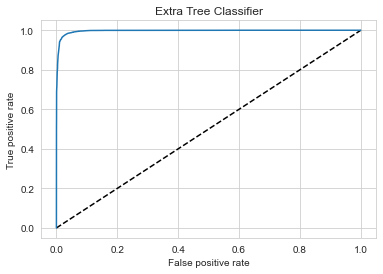

In [137]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Extra Tree Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Extra Tree Classifier')
plt.show()

# Saving the model

In [139]:
import pickle
filename='TermDeposit.pkl'
pickle.dump(Final_model,open(filename,'wb'))

In [140]:
model=pickle.load(open("TermDeposit.pkl","rb"))
prediction=model.predict(test_df)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [141]:
prediction2=model.predict(x_test)
prediction2

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [142]:
a=np.array(y_test)
df4=pd.DataFrame()
df4["Predicted"]=prediction2
df4["Original"] = a
df4

,Predicted,Original
0,1,1
1,1,1
2,1,0
3,0,0
4,1,1
...,...,...
9827,0,0
9828,0,0
9829,1,1
9830,0,0
